In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from typing import List
import numpy as np
def get_circle_points(radius: float, center: tuple, n_samples=10) -> List[tuple]:
    theta = np.linspace(0, 2*np.pi, n_samples)
    x = radius * np.cos(theta) + center[0]
    y = radius * np.sin(theta) + center[1]
    return list(x), list(y)

<Axes: xlabel='x', ylabel='y'>

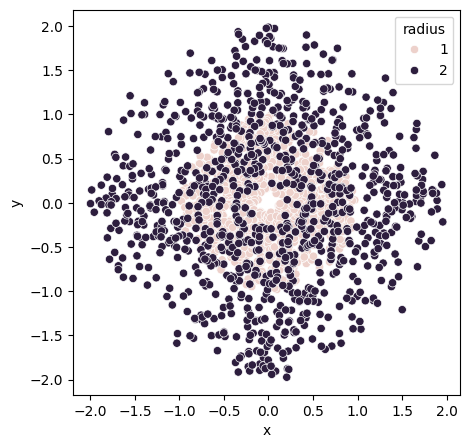

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

randomizer_param = 0.9

x1, x2 = get_circle_points(1, (0,0), n_samples=1000)
x1 = [x * (1 - np.random.rand()*randomizer_param) for x in x1]
x2 = [x * (1 - np.random.rand()*randomizer_param) for x in x2]
y12 = [1] * len(x1)
x3, x4 = get_circle_points(2, (0, 0), n_samples=1000)
x3 = [x * (1 - np.random.rand()*randomizer_param) for x in x3]
x4 = [x * (1 - np.random.rand()*randomizer_param) for x in x4]
y34 = [2] * len(x3)

df = pd.DataFrame({
    'x': x1 + x3,
    'y': x2 + x4,
    'radius': y12 + y34
})

plt.figure(figsize=(5, 5))
sns.scatterplot(x=df['x'], y=df['y'], hue=df['radius'])

In [4]:
df['x_squared'] = df['x']**2
df['y_squared'] = df['y']**2
df['xy'] = df['x']*df['y']

In [5]:
import plotly.express as px
fig = px.scatter_3d(data_frame=df, x='x_squared', y='y_squared', z='xy', color='radius')
fig.show()

In [6]:
X = df[['x', 'y']]
X_poly = df[['x_squared', 'y_squared', 'xy']]
y = df['radius']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_p, y_train_p)
y_pred = svc.predict(X_test_p)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test_p, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.91      0.82       200
           2       0.88      0.69      0.77       200

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.79       400
weighted avg       0.81      0.80      0.79       400



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# params = {
#     'C': [100, 10, 1, 0.1, 0.01],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [1, 2, 3],
#     'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
# }

params = {
    'C': [100, 10, 1],
    'kernel': ['rbf'],
    'gamma': [10, 1, 0.1],
    'class_weight': [{1: w1, 2: w2} for w1 in [100, 10, 1] for w2 in [100, 10, 1]]
}
# grid_model = GridSearchCV(estimator=svc, param_grid=params, refit=True, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')
model = Pipeline(steps=[
    ('standardizer', StandardScaler()),
    ('grid', GridSearchCV(
        estimator=svc,
        param_grid=params,
        refit=True,
        cv=5,
        verbose=3,
        n_jobs=-1,
        scoring='f1'
    ))
])
model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 3/5] END C=100, class_weight={1: 100, 2: 100}, gamma=10, kernel=rbf;, score=0.761 total time=  16.8s
[CV 2/5] END C=100, class_weight={1: 100, 2: 100}, gamma=10, kernel=rbf;, score=0.749 total time=  19.3s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, gamma=10, kernel=rbf;, score=0.764 total time=  22.4s
[CV 4/5] END C=100, class_weight={1: 100, 2: 100}, gamma=10, kernel=rbf;, score=0.779 total time=  26.2s
[CV 5/5] END C=100, class_weight={1: 100, 2: 100}, gamma=10, kernel=rbf;, score=0.787 total time=  13.9s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, gamma=1, kernel=rbf;, score=0.837 total time=  19.9s
[CV 3/5] END C=100, class_weight={1: 100, 2: 100}, gamma=1, kernel=rbf;, score=0.827 total time=  20.9s
[CV 1/5] END C=100, class_weight={1: 100, 2: 100}, gamma=0.1, kernel=rbf;, score=0.832 total time=   2.0s
[CV 2/5] END C=100, class_weight={1: 100, 2: 100}, gamma=1, kernel=rbf;, score=0.838 total time=  2

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardizer', ...), ('grid', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC(kernel='linear')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [100, 10, ...], 'class_weight': [{1: 100, 2: 100}, {1: 100, 2: 10}, ...], 'gamma': [10, 1, ...], 'kernel': ['rbf']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.

In [11]:
model.named_steps['grid'].best_params_

{'C': 100, 'class_weight': {1: 10, 2: 10}, 'gamma': 0.1, 'kernel': 'rbf'}

In [12]:
model.named_steps['grid'].best_score_

np.float64(0.838238951438574)

In [13]:
y_pred1 = model.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84       200
           2       0.96      0.65      0.78       200

    accuracy                           0.81       400
   macro avg       0.85      0.81      0.81       400
weighted avg       0.85      0.81      0.81       400

